In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('general_data.csv')
print(dataset.head())

   Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0                 1.0

In [3]:
print(dataset.isnull)

<bound method DataFrame.isnull of       Age Attrition     BusinessTravel              Department  \
0      51        No      Travel_Rarely                   Sales   
1      31       Yes  Travel_Frequently  Research & Development   
2      32        No  Travel_Frequently  Research & Development   
3      38        No         Non-Travel  Research & Development   
4      32        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
4405   42        No      Travel_Rarely  Research & Development   
4406   29        No      Travel_Rarely  Research & Development   
4407   25        No      Travel_Rarely  Research & Development   
4408   42        No      Travel_Rarely                   Sales   
4409   40        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  EmployeeID  \
0                    6          2  Life Sciences              1           1   
1              

In [4]:
print(dataset.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
4405    False
4406    False
4407    False
4408    False
4409    False
Length: 4410, dtype: bool


In [5]:
dataset.drop_duplicates()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [6]:
analyse_mean = pd.DataFrame(dataset[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].mean())
analyse_mode = pd.DataFrame(dataset[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].mode())
analyse_median = pd.DataFrame(dataset[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].median())
analyse_var = pd.DataFrame(dataset[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].var())
analyse_skew = pd.DataFrame(dataset[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].skew())
analyse_kurt = pd.DataFrame(dataset[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].kurt())

In [7]:
final_sheet = pd.concat([analyse_mean,analyse_mode.transpose(),analyse_median,analyse_var,analyse_skew,analyse_kurt], axis=1)
final_df = pd.DataFrame(final_sheet)
final_df.columns = ['Mean','Mode','Median','variance','skew','kurtosis']
final_df

,Mean,Mode,Median,variance,skew,kurtosis
Age,36.923810,35.0,36.0,8.341719e+01,0.413005,-0.405951
DistanceFromHome,9.192517,2.0,7.0,6.569144e+01,0.957466,-0.227045
Education,2.912925,3.0,3.0,1.048438e+00,-0.289484,-0.560569
MonthlyIncome,65029.312925,23420.0,49190.0,2.215480e+09,1.368884,1.000232
NumCompaniesWorked,2.694830,1.0,2.0,6.244436e+00,1.026767,0.007287
PercentSalaryHike,15.209524,11.0,14.0,1.338907e+01,0.820569,-0.302638
TotalWorkingYears,11.279936,10.0,10.0,6.056298e+01,1.116832,0.912936
TrainingTimesLastYear,2.799320,2.0,3.0,1.661465e+00,0.552748,0.491149
YearsAtCompany,7.008163,5.0,5.0,3.751728e+01,1.763328,3.923864
YearsSinceLastPromotion,2.187755,0.0,1.0,1.037935e+01,1.982939,3.601761


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff2f8104810>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff2f8114e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff2f81047d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff2f818f910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff2f8104710>],
 'means': []}

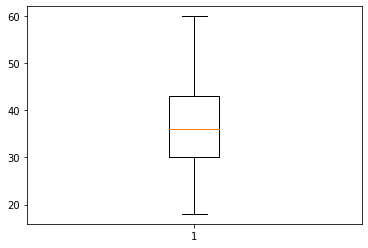

In [8]:
box_plot_age = dataset.Age
plt.boxplot(box_plot_age)